In [2]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

In [3]:
SEED = 1
random.seed(SEED)
np.random.seed(SEED)

In [8]:
Kenya = pd.read_csv("./Data/Kenya_training.csv")
Spain =  pd.read_csv("./Data/Spain_training.csv")
VNM =  pd.read_csv("./Data/VNM_training.csv")
VNM.rename(columns={'Lat': 'lat', 'Lon': 'lon'}, inplace=True)

df = pd.concat([Kenya, Spain, VNM], axis=0)

In [10]:
y_ = df['TARGET']
X_ = df[['blue_p50', 'green_p50', 'nir_p50', 'nira_p50', 're1_p50', 're2_p50', 
         're3_p50', 'red_p50', 'swir1_p50', 'swir2_p50', 'VV_p50', 'VH_p50']]

In [12]:
X_train, X_eval, y_train, y_eval = train_test_split(X_, y_, test_size=0.1, random_state=1)

In [14]:
LGBM = LGBMClassifier(force_col_wise=True)
LGBM.fit(X_train, y_train)
LGBM.score(X_eval, y_eval)

[LightGBM] [Info] Number of positive: 1324, number of negative: 1218
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 2542, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.520850 -> initscore=0.083447
[LightGBM] [Info] Start training from score 0.083447


0.9328621908127208

### Submission

In [19]:
Kenya = pd.read_csv("./Data/Kenya_testing.csv")
Spain =  pd.read_csv("./Data/Spain_validation.csv")
VNM =  pd.read_csv("./Data/VNM_testing.csv")
VNM.rename(columns={'Lon': 'lon', 'Lat': 'lat'}, inplace=True)

submission = pd.DataFrame()
country = ['Kenya', 'Spain', 'VNM']
files = [Kenya, Spain, VNM]

In [21]:
for i in range(3):
    tmp = pd.DataFrame()
    # Create ID for submission file
    ID = [country[i] + '_' + str(x) for x in files[i]['ID']]
    # Predict
    X_ = files[i][['blue_p50', 'green_p50', 'nir_p50', 'nira_p50', 're1_p50', 're2_p50', 
         're3_p50', 'red_p50', 'swir1_p50', 'swir2_p50', 'VV_p50', 'VH_p50']]
    TARGET = LGBM.predict(X_)

In [23]:
TARGET.shape

(979,)

In [ ]:
    
    tmp["ID"] = ID
    tmp["TARGET"] = TARGET
    submission = pd.concat([submission, tmp], axis=0)
submission.index = submission['ID']

submission['TARGET'].to_csv('submission_1.csv')

In [10]:
submission.head(10)

,ID,TARGET
ID,,
Kenya_1,Kenya_1,1
Kenya_2,Kenya_2,1
Kenya_3,Kenya_3,1
Kenya_4,Kenya_4,1
Kenya_5,Kenya_5,1
Kenya_6,Kenya_6,1
Kenya_7,Kenya_7,1
Kenya_8,Kenya_8,1
Kenya_9,Kenya_9,1


<BarContainer object of 12 artists>

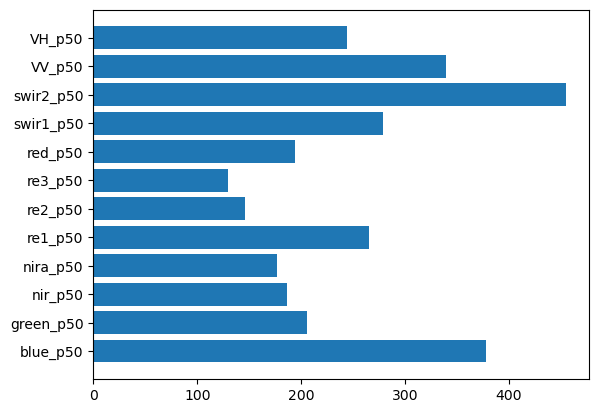

In [11]:
plt.barh(LGBM.feature_name_, LGBM.feature_importances_)